# Neural Network design and training with Keras

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

2022-05-24 17:38:44.859355: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-24 17:38:44.859375: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
columns = ['Exam 1 Score', 'Exam 2 score', 'Result']
dataset = pd.read_csv('./ex2data1.txt', delimiter=',', header=None, names=columns)

In [3]:
X = dataset.loc[:,[columns[0],columns[1]]]
y = dataset.loc[:,[columns[-1]]]

## Single Neuron Neural Network

In [4]:
model = keras.Sequential()
model.add(layers.Dense(1, input_shape = (X.shape[1],), use_bias=True, activation='sigmoid'))

2022-05-24 17:38:47.769315: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-24 17:38:47.769345: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-24 17:38:47.769372: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Ultron): /proc/driver/nvidia/version does not exist
2022-05-24 17:38:47.769671: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
optimizer = keras.optimizers.SGD(learning_rate=0.00001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(X.values,y.values,batch_size = 8, epochs = 1200, verbose = 1)

Epoch 1/1200
13/13 [==============================] - 0s 1ms/step - loss: 43.1924 - accuracy: 0.6000
Epoch 2/1200
13/13 [==============================] - 0s 2ms/step - loss: 43.0745 - accuracy: 0.6000
Epoch 3/1200
13/13 [==============================] - 0s 2ms/step - loss: 42.9564 - accuracy: 0.6000
Epoch 4/1200
13/13 [==============================] - 0s 2ms/step - loss: 42.8401 - accuracy: 0.6000
Epoch 5/1200
13/13 [==============================] - 0s 2ms/step - loss: 42.7196 - accuracy: 0.6000
Epoch 6/1200
13/13 [==============================] - 0s 2ms/step - loss: 42.6001 - accuracy: 0.6000
Epoch 7/1200
13/13 [==============================] - 0s 2ms/step - loss: 42.4839 - accuracy: 0.6000
Epoch 8/1200
13/13 [==============================] - 0s 2ms/step - loss: 42.3677 - accuracy: 0.6000
Epoch 9/1200
13/13 [==============================] - 0s 2ms/step - loss: 42.2419 - accuracy: 0.6000
Epoch 10/1200
13/13 [==============================] - 0s 2ms/step - loss: 42.1251 - accura

In [8]:
history.history

{'loss': [43.192413330078125,
  43.074462890625,
  42.956356048583984,
  42.840110778808594,
  42.71958541870117,
  42.60006332397461,
  42.48387145996094,
  42.3676643371582,
  42.24185562133789,
  42.125144958496094,
  42.00343704223633,
  41.889259338378906,
  41.769439697265625,
  41.652584075927734,
  41.53595733642578,
  41.416114807128906,
  41.29658508300781,
  41.17719650268555,
  41.060855865478516,
  40.94316864013672,
  40.82658004760742,
  40.710060119628906,
  40.59217071533203,
  40.475677490234375,
  40.36231994628906,
  40.245262145996094,
  40.125850677490234,
  40.00929641723633,
  39.89153289794922,
  39.772274017333984,
  39.652915954589844,
  39.53494644165039,
  39.4180793762207,
  39.298458099365234,
  39.18412399291992,
  39.06287384033203,
  38.9485969543457,
  38.83201599121094,
  38.71536636352539,
  38.59571838378906,
  38.474464416503906,
  38.35771179199219,
  38.237525939941406,
  38.121238708496094,
  38.00361633300781,
  37.8838005065918,
  37.76425933

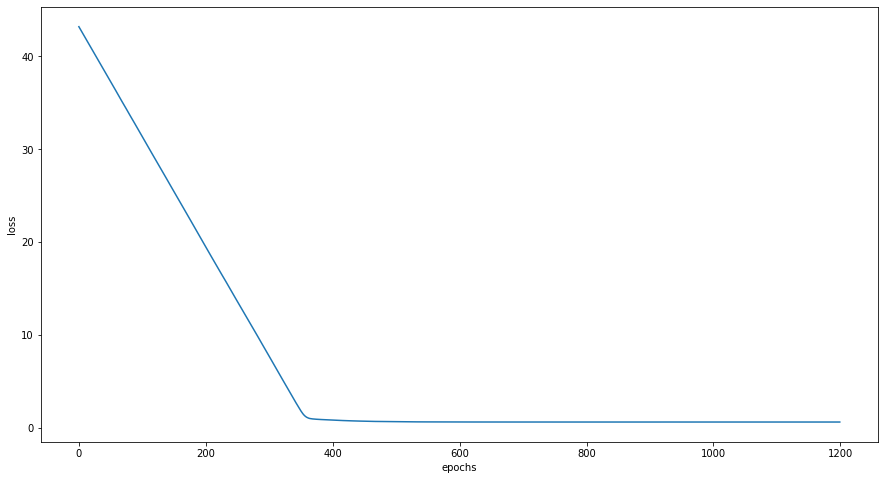

In [9]:
plt.figure(figsize = (15,8))
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [10]:
model.save()

TypeError: Model.save() missing 1 required positional argument: 'filepath'